# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 15:49:05--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.08s  

2016-10-24 15:49:05 (62.8 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

In [2]:
!wc -l abq-food-inspections-fy2010.csv

17557 abq-food-inspections-fy2010.csv


Let's look at the column in the csv file

In [3]:
!csvcut -n abq-food-inspections-fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


### What do all the columns mean?
1: FACILITY_NAME: Name of the facility where the inspection occurred

2: FACILITY_KEY: The unique key of the facility where the inspection occurred

3: SITE_ADDRESS: Street address of the facility where the inspection occurred

4: CITY: City of the facility where the inspection occurred

5: STATE: State of the facility where the inspection occurred

6: ZIP: Zip of the facility where the inspection occurred

7: OWNER_KEY: The unique key of the Owner of the facility where the inspection occurred at the time of 
the inspection

8: OWNER_NAME: Name of the Owner of the facility where the inspection occurred at the time of the inspection

9: NATURE_OF_BUSINESS: The type of business

10: STREET_NUMBER: Street number of the facility where the inspection occurred

11: STREET_NAME: Street name of the facility where the inspection occurred

12: STREET_TYPE: Street type of the facility where the inspection occurred

13: POST_DIRECTIONAL: Postal direction of the facility where the inspection occurred

14: PHONE: Phone number of the facility where the inspection occurred

15: PROGRAM_CATEGORY: Id that indicates the type of facility permit the inspection was performed

16: PROGRAM_CATEGORY_DESCRIPTION: Descript of the id that indicates the type of facility

17: INSPECTION_DATE: Date the inspection occurred

18: INSPECTION_TYPE: Code for type of inspection

19: INSPECTION_DESC: Description of the inspection

20: SERIAL_NUM: Unique ID for the inspection daily activity

21: ACTION_CODE: Code of the action taken

22: ACTION_DESC: Description of the action taken

23: RESULT_CODE: Code of the result of the inspection

24: RESULT_DESC: Description of the result of the inspection

25: VIOLATION_CODE: The code for the violation

26: VIOLATION_DESC: Description of the violation that was found

27: INSPECTION_MEMO: Notes from the inspection made by the inspector



### Are there null values?
SITE_ADDRESS

NATURE_OF_BUSINESS

STREET_NUMBER

STREET_NAME

STREET_TYPE

POST_DIRECTIONAL

PHONE

PROGRAM_CATEGORY_DESCRIPTION

INSPECTION_TYPE

VIOLATION_CODE

VIOLATION_DESC

INSPECTION_MEMO

### Which columns interest you the most?
1: FACILITY_NAME

9: NATURE_OF_BUSINESS

16: PROGRAM_CATEGORY_DESCRIPTION
 
19: INSPECTION_DESC

22: ACTION_DESC

24: RESULT_DESC
 
26: VIOLATION_DESC
 

In [4]:
!csvcut -c1,9,16 abq-food-inspections-fy2010.csv | head | csvlook

|--------------------------+--------------------+-------------------------------|
|  FACILITY_NAME           | NATURE_OF_BUSINESS | PROGRAM_CATEGORY_DESCRIPTION  |
|--------------------------+--------------------+-------------------------------|
|  00BSAY IT WITH CAKE     | CAKE DECORATING    | Food Processor                |
|  00BSAY IT WITH CAKE     | CAKE DECORATING    | Food Processor                |
|  00BSAY IT WITH CAKE     | CAKE DECORATING    | Food Processor                |
|  00BSAY IT WITH CAKE     | CAKE DECORATING    | Food Processor                |
|  00BSAY IT WITH CAKE     | CAKE DECORATING    | Food Processor                |
|  2000 VIETNAM RESTAURANT | RESTAURANT         | Food Service Establishment    |
|  2000 VIETNAM RESTAURANT | RESTAURANT         | Food Service Establishment    |
|  2000 VIETNAM RESTAURANT | RESTAURANT         | Food Service Establishment    |
|  328 CHINESE CUISINE     |                    | Food Service Establishment    |
|---------------

In [5]:
!csvcut -c1,19,22,24,26 abq-food-inspections-fy2010.csv | head | csvlook

|--------------------------+-------------------------+-------------+----------------+-----------------------------------|
|  FACILITY_NAME           | INSPECTION_DESC         | ACTION_DESC | RESULT_DESC    | VIOLATION_DESC                    |
|--------------------------+-------------------------+-------------+----------------+-----------------------------------|
|  00BSAY IT WITH CAKE     | EMERGENCY RESPONSE      | NON-GRADED  | NOT APPLICABLE | Delivered Informational Brochure  |
|  00BSAY IT WITH CAKE     | ROUTINE FOOD INSPECTION | APPROVED    | IN COMPLIANCE  | No Violations Found               |
|  00BSAY IT WITH CAKE     | ROUTINE FOOD INSPECTION | APPROVED    | IN COMPLIANCE  | Additional Comments               |
|  00BSAY IT WITH CAKE     | ROUTINE FOOD INSPECTION | APPROVED    | IN COMPLIANCE  | No Violations Found               |
|  00BSAY IT WITH CAKE     | ROUTINE FOOD INSPECTION | APPROVED    | IN COMPLIANCE  | Additional Comments               |
|  2000 VIETNAM RESTAURA

In [6]:
!csvstat abq-food-inspections-fy2010.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ECHO INC:	68
		ISLETA AMPHITHEATER:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		80949:	68
		32817:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: NM, 87
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

### Which columns present some complications or questions you would like to ask?

I don't see any columns that present complications. 

The questions that I want to ask are:
1. Which business type is the most common type to have inspection? and what is the result of it?
2. Which month has the highest number of inspection occured?

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [7]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [8]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [9]:
!createdb -U dbuser food

In [10]:
%sql postgresql://dbuser@localhost:5432/food

'Connected: dbuser@food'

In [11]:
!shuf -n 10000 abq-food-inspections-fy2010.csv | csvstat


  1. WINNING COFFEE CO
	<class 'str'>
	Nulls: False
	Unique values: 2484
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	92
		ISOTOPES PARK - OVATIONS:	51
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	46
		DIONS PIZZA:	42
		OOB CALIFORNIA DEL NORTE ICE CREAM LLC:	42
	Max length: 77
  2. 44747
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 467876247
	Mean: 46792.30393039304
	Median: 51074
	Standard Deviation: 32677.8172067117
	Unique values: 2680
	5 most frequent values:
		46323:	51
		65863:	46
		64527:	42
		90924:	39
		32817:	38
  3. 111 HARVARD AV SE
	<class 'str'>
	Nulls: True
	Unique values: 2352
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	52
		644 OLD COORS BLVD SW:	46
		2200 SUNPORT BLVD SE:	45
		1415 4TH ST SW:	42
		5210 CENTRAL AV SE:	41
	Max length: 35
  4. ALBUQUERQUE
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. NM
	<class 'str'>
	Nulls: False
	Values: NM, 87
  6. 87106
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most fre

In [12]:
%%sql
DROP TABLE IF EXISTS food;
CREATE TABLE food (
    FACILITY_NAME VARCHAR(77),
    FACILITY_KEY INTEGER,
    SITE_ADDRESS VARCHAR(35),
    CITY VARCHAR(11),
    STATE VARCHAR(2),
    ZIP VARCHAR(10),
    OWNER_KEY INTEGER,
    OWNER_NAME VARCHAR(82),
    NATURE_OF_BUSINESS VARCHAR(25),
    STREET_NUMBER VARCHAR(7),
    STREET_NAME VARCHAR(24),
    STREET_TYPE VARCHAR(4),
    POST_DIRECTIONAL VARCHAR(2),
    PHONE VARCHAR(15),
    PROGRAM_CATEGORY VARCHAR(4),
    PROGRAM_CATEGORY_DESCRIPTION VARCHAR(40),
    INSPECTION_DATE TIMESTAMP, 
    INSPECTION_TYPE VARCHAR(40),
    INSPECTION_DESC VARCHAR(32),
    SERIAL_NUM VARCHAR(9),
    ACTION_CODE VARCHAR(2),
    ACTION_DESC VARCHAR(50),
    RESULT_CODE VARCHAR(2),
    RESULT_DESC VARCHAR(37),
    VIOLATION_CODE VARCHAR(10),
    VIOLATION_DESC VARCHAR(50),
    INSPECTION_MEMO VARCHAR(40)
    )

Done.
Done.


[]

In [13]:
!pwd

/home/jovyan/work


In [14]:
%%sql
COPY food FROM '/home/jovyan/work/abq-food-inspections-fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [15]:
%%sql
SELECT COUNT(*) FROM food;

1 rows affected.


count
17556


In [16]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'food';


27 rows affected.


column_name,data_type,character_maximum_length,is_nullable
facility_name,character varying,77,YES
facility_key,integer,None,YES
site_address,character varying,35,YES
city,character varying,11,YES
state,character varying,2,YES
zip,character varying,10,YES
owner_key,integer,None,YES
owner_name,character varying,82,YES
nature_of_business,character varying,25,YES
street_number,character varying,7,YES


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

### What is the most common type of inspection?

In [17]:
%%sql
SELECT inspection_desc, COUNT(*) AS count
FROM food
GROUP BY inspection_desc
ORDER BY count DESC

15 rows affected.


inspection_desc,count
ROUTINE FOOD INSPECTION,12439
EMERGENCY RESPONSE,1987
New Business Inspection,1005
PRE-OPENING FOOD INSPECTION,743
ADDITIONAL SERVICE PROVIDED,439
MOBILE UNIT FOOD INSPECTION,377
PHONE CALL,247
FOOD FOLLOW-UP INSPECTION,143
FOLLOW-UP DOCUMENTATION RECEIVED,75
MANAGERIAL ASSISTANCE,54


### which type of business has the highest mumber of inspection?

In [18]:
%%sql
SELECT nature_of_business , COUNT(*) AS count
FROM food
GROUP BY nature_of_business
ORDER BY count DESC
LIMIT 25;

25 rows affected.


nature_of_business,count
RESTAURANT,4994
FOOD SERVICE,691
GROCERY,618
BAR/RESTAURANT,508
APS SCHOOL FOOD SERVICE,470
None,429
BKRY/GROC/REST,315
INST KITCHEN,272
HOTEL,254
CHILD CARE,251


Obviously, restaurant is the most common type of business that has the most inspections. 4994 of the inspections are done in the restaurant. The second business type that has the most inspections is food services, it has 691 inspections. The third one is grocery, which has 618 inspections. 

Next, I want to look into the restaurant data, which  restaurant has the most number of inspections?

In [19]:
%%sql
SELECT facility_name, COUNT(*) AS count
    FROM food
    GROUP BY facility_name
    ORDER BY count DESC
    LIMIT 10;

10 rows affected.


facility_name,count
SMITHS FOOD AND DRUG CENTERS INC,154
ISOTOPES PARK - OVATIONS,93
PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR,85
ISLETA AMPHITHEATER,68
ECHO INC,68
DIONS PIZZA,67
CIRCLE K 8936,66
OOB CALIFORNIA DEL NORTE ICE CREAM LLC,65
TALIN MARKET WORLD FOOD FARE,64
OOB MOM THAI FOOD,61


Within the restaurant business type, SMITHS FOOD AND DRUG CENTERS INC is the restaurant which has the highest nymber of inspections, it has 154 inspections. Then, out of 154 inspections, I am curious about what are those inspections, in other words, what is the causes for those 154 inspections.

In [20]:
%%sql
SELECT inspection_desc, COUNT(*) AS count
FROM food
WHERE facility_name IN (
    SELECT facility_name
    FROM food
    GROUP BY facility_name
    ORDER BY COUNT(*) DESC
    LIMIT 1)
GROUP BY inspection_desc
ORDER BY count DESC
LIMIT 10;

4 rows affected.


inspection_desc,count
ROUTINE FOOD INSPECTION,130
EMERGENCY RESPONSE,15
PHONE CALL,7
ADDITIONAL SERVICE PROVIDED,2


Now we know 130 out 154 inspections are due to routine food inspection, 15 of those are due to emergency response, 7 inspections are caused by phone call. 

Next, not all inspections will have a violation, so what is the actual violation for SMITHS FOOD AND DRUG CENTERS INC?

In [24]:
%%sql
SELECT violation_desc, COUNT(*) AS count
FROM food
WHERE facility_name ='SMITHS FOOD AND DRUG CENTERS INC'
and 
violation_desc not in ('No Violations Found', 'None', 'Additional Comments', 'Delivered Informational Brochure') 
GROUP BY violation_desc
ORDER BY count DESC
LIMIT 10
;

10 rows affected.


violation_desc,count
Improper sanitizing,5
"Floors, Walls, Ceilings",4
Plumbing: Improperly installed/maintained/supplied,4
Hot Holding,4
"Thermometers not provided, not accurate/consp",3
Food unprotected,2
Cold Holding,2
Other Operations - Lighting,2
Evidence of insects,2
"Cooling, Heating Procedures",1


Regardless of the no violation inspection, improper sanitizing, floors walls ceilings, Plumbing: Improperly installed/maintained/supplied seems to be the top three factors to cause a violation.

Let's employ visualization tool to observe this trend of violations at SMITHS FOOD AND DRUG CENTERS INC? 

<Container object of 10 artists>

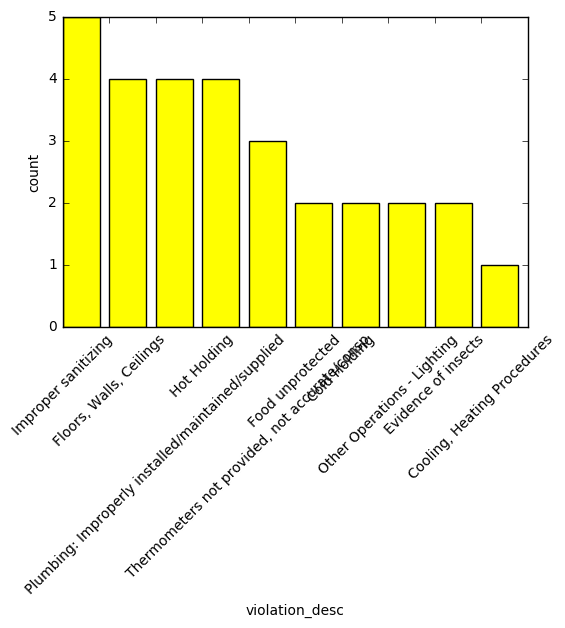

In [25]:
%matplotlib inline
result = _
result.bar(color='yellow')

Now we can conclude what causes the most violatons in SMITHS FOOD AND DRUG CENTERS INC graphically. 

After the violation is found, what happen next to SMITHS FOOD AND DRUG CENTERS INC, are they downgraded? or anything happened? In other words, what is the result of the violations?

In [26]:
%%sql
SELECT result_desc, COUNT(*) AS count
FROM food
WHERE facility_name ='SMITHS FOOD AND DRUG CENTERS INC'
GROUP BY result_desc
ORDER BY count DESC
;

4 rows affected.


result_desc,count
IN COMPLIANCE,130
NOT APPLICABLE,20
RECALL VERIFICATION,2
PHONE CALL,2


130 violations is incompliance, 20 violations is not appliable. 

### Second, Which month has the highest inspections?

In [27]:
%%sql
Select extract(month from INSPECTION_DATE) as month, count(*)
from food
Where violation_desc not in ('No Violations Found', 'None', 'Additional Comments', 'Delivered Informational Brochure') 
Group by month
Order by count desc;

12 rows affected.


month,count
12.0,556
3.0,535
4.0,460
11.0,446
2.0,445
9.0,445
10.0,441
7.0,438
8.0,405
1.0,395


<Container object of 12 artists>

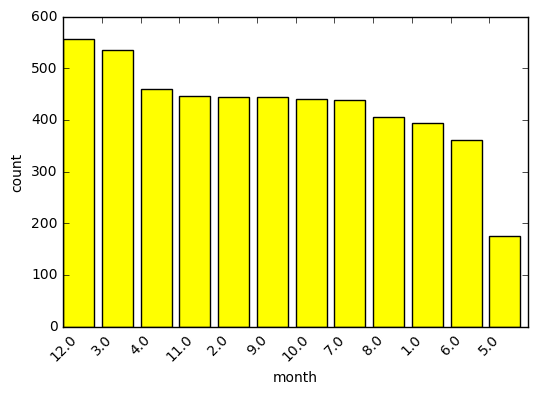

In [28]:
result = _
result.bar(color='yellow')

Visualization helps us to interpret the result clearly that december has the highest number of inspections occured. 

Let's compare the actual violation numebers between 2009 and 2010, excluding the no violations results. 

In [29]:
%%sql
Select extract(year from INSPECTION_DATE) as year, count(*)
from food
Where violation_desc not in ('No Violations Found', 'None', 'Additional Comments', 'Delivered Informational Brochure') 
Group by year
Order by count desc
limit 10;

2 rows affected.


year,count
2009.0,2731
2010.0,2372


## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

In [30]:
%%sql
SELECT DISTINCT facility_name, facility_key
FROM food
ORDER BY facility_name
limit 10;

10 rows affected.


facility_name,facility_key
00BSAY IT WITH CAKE,50534
2000 VIETNAM RESTAURANT,31468
328 CHINESE CUISINE,72789
5 STAR BURGERS,90929
66 DINER,7820
7 BAR ELEMENTARY SCHOOL,2207
7 ELEVEN,21347
7 ELEVEN 57722,21346
7 ELEVEN 700,21348
7 ELEVEN 702,21350


In [31]:
%%sql
SELECT DISTINCT owner_name, owner_key
FROM food
ORDER BY owner_name
limit 10;

10 rows affected.


owner_name,owner_key
110 SUNPORT LLC,80806
1ST CLASS LEARNING CENTER,39984
2000 VIETMAN RESTAURANT,29294
21ST CENTURY PUBLIC ACADEMY,65277
300 CLUB GRILL,80954
328 CHINESE CUISINE,66644
3RD ALARM COFFEE,67195
5 STAR ABQ INC,82383
6001 INC,15660
66 DINER,6743


In [32]:
%%sql
SELECT restaurant_name, restaurant_id
FROM (
    SELECT DISTINCT facility_name as restaurant_name, facility_key AS restaurant_id 
    FROM food
    
    UNION
    
    SELECT DISTINCT owner_name as restaurant_name, owner_key AS restaurant_id 
    FROM food
    ) AS d
LIMIT 10;

10 rows affected.


restaurant_name,restaurant_id
OOB SPECIALTY HOSPITAL OF ALBUQUER,91957
QUIZNOS SUB 12316,82796
QUALITY INN UNIVERSITY,92080
OOB WEENIE WAGON,85431
SUSHI GEN,54063
FEDERICO SR,77232
SMITHS 439,4291
SB RESTAURANT CO,61877
DUKE CITY AQUATICS FOUNDATION,79374
IL VICINO HEIGHTS,29317


In [33]:
%%sql
ALTER TABLE food
ADD COLUMN facility_nid INTEGER;

Done.


[]

In [34]:
%%sql
DROP TABLE IF EXISTS names;
CREATE TABLE names(
    id SERIAL,
    name VARCHAR(164),
    restaurant_id INTEGER
);

Done.
Done.


[]

In [35]:
%%sql
INSERT INTO names (name, restaurant_id)
SELECT restaurant_name, restaurant_id FROM (
   SELECT DISTINCT facility_name as restaurant_name, facility_key AS restaurant_id 
   FROM food
    
    UNION
    
    SELECT DISTINCT owner_name as restaurant_name, owner_key AS restaurant_id 
    FROM food
) AS d;

4727 rows affected.


[]

In [36]:
%%sql
ALTER TABLE food 
ADD COLUMN facility_newid INTEGER;

Done.


[]

In [37]:
%%sql
UPDATE food as r
SET facility_newid = n.id
FROM names as n
WHERE r.facility_name = n.name;

17556 rows affected.


[]

In [38]:
%%sql
ALTER TABLE food
ADD COLUMN owner_newid INTEGER;


Done.


[]

In [39]:
%%sql
UPDATE food as r
SET owner_newid = n.id
FROM names as n
WHERE r.owner_name = n.name;

17556 rows affected.


[]

In [40]:
%%sql
select distinct facility_name,owner_name, facility_newid, owner_newid 
from food 
limit 10;

10 rows affected.


facility_name,owner_name,facility_newid,owner_newid
OOB ALPHA CHI OMEGA,ALPHA CHI OMEGA,3684,432
BOYD COFFEE CO,BOYD COFFEE CO,3614,3614
OOB SUPER SUPPERS,SUPER SUPPERS ABQ WESTSIDE,3698,1932
SUBWAY,WIGH LLC,162,350
OOB WENDYS 11,DOUBLE CHEESE CORP,2115,3222
TIMES SQUARE DELI MART,KAYED LLC,2946,4467
OOB BROADWAY CHEVRON,EVER READY OIL CO INC,926,1168
SUBWAY 36875,BERMUDEZ SHORTS INC,501,3560
ANDALUZ RESTAURANT KITCHEN,GEMSTONE LA POSADA LLC,4068,3316
PANGAEA CINEMA LLC,PANGAEA CINEMA LLC,2665,2665


### THE END